In [284]:
import pandas as pd
import pickle
import numpy as np
import ftfy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Importing Numbers

In [285]:
!pwd

/Users/maliksalam/Google Drive/Data Science/Metis/Bootcamp/Projects/Project Luther


In [286]:
json = pd.read_json('data/thenumbers.json')

In [287]:
df_numbers = pd.DataFrame(json, columns = ['title', 'release_date', 'budget', 'dom_gross', 'ww_gross'])
df_numbers.head()

,title,release_date,budget,dom_gross,ww_gross
0,Avatar,12/18/2009,"$425,000,000","$760,507,625","$2,783,918,982"
1,Pirates of the Caribbean: On Stranger Tides,5/20/2011,"$410,600,000","$241,063,875","$1,045,663,875"
2,Avengers: Age of Ultron,5/1/2015,"$330,600,000","$459,005,868","$1,408,218,722"
3,Star Wars Ep. VII: The Force Awakens,12/18/2015,"$306,000,000","$936,662,225","$2,058,662,225"
4,Pirates of the Caribbean: At Worldâ€™s End,5/24/2007,"$300,000,000","$309,420,425","$963,420,425"


In [288]:
#clean titles
df_numbers.loc[:,'title'] = df_numbers.loc[:,'title'].apply(lambda x : ftfy.fix_text(x))

In [289]:
# Clean number formatting
df_numbers.iloc[:,2:] = df_numbers.iloc[:,2:].replace({'\$':'',',':''}, regex=True)
df_numbers.budget = pd.to_numeric(df_numbers.budget)
df_numbers.dom_gross = pd.to_numeric(df_numbers.dom_gross)
df_numbers.ww_gross = pd.to_numeric(df_numbers.ww_gross)
df_numbers.head()

,title,release_date,budget,dom_gross,ww_gross
0,Avatar,12/18/2009,425000000,760507625,2783918982
1,Pirates of the Caribbean: On Stranger Tides,5/20/2011,410600000,241063875,1045663875
2,Avengers: Age of Ultron,5/1/2015,330600000,459005868,1408218722
3,Star Wars Ep. VII: The Force Awakens,12/18/2015,306000000,936662225,2058662225
4,Pirates of the Caribbean: At World's End,5/24/2007,300000000,309420425,963420425


In [290]:
# convert release_date to date_time
df_numbers.release_date = pd.to_datetime(df_numbers.release_date)

In [291]:
df_numbers.dtypes

title                   object
release_date    datetime64[ns]
budget                   int64
dom_gross                int64
ww_gross                 int64
dtype: object

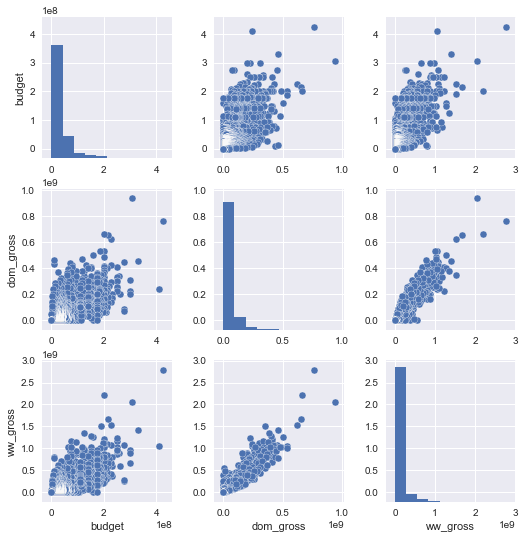

In [292]:
sns.pairplot(df_numbers);

In [293]:
# these distributions look quite skewed. we might need some transformation

## Reading in and Cleaning Box Office Mojo 

In [294]:
json = pd.read_json('data/boxofficemojo.json')
df_bom = pd.DataFrame(json)
df_bom.head(10)

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",$110 million,[Joe Carnahan],"$77,222,099",Action,PG-13,"3,535","$25,669,455","[Ridley Scott, , (executive), Tony Scott, Ale...",6/11/2010,1 hrs. 57 min.,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,"3,544",[Skip Woods],"$177,238,796"
1,[],N/A,[],"$4,264,983",Drama,Unrated,302,"$2,190,042",[],10/28/2016,2 hrs. 38 min.,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302,[],"$28,360,590"
2,[],N/A,[],"$930,211",Musical,PG-13,4,"$83,743",[],4/18/1986,1 hrs. 48 min.,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4,[Don Macpherson],None
3,"[Paul Newman, Sally Field]",N/A,[Sydney Pollack],"$40,716,963",Drama / Thriller,PG,2,"$97,667",[Sydney Pollack],11/20/1981,1 hrs. 56 min.,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994,[],None
4,[],N/A,[],"$1,031",Thriller,Unrated,n/a,n/a,[],7/5/2013,1 hrs. 22 min.,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,n/a,[],None
5,"[Benjamin Walker, Dominic Cooper, Anthony Mack...",$69 million,[Timur Bekmambetov],"$37,519,139",Horror Thriller,R,"3,108","$16,306,974","[Timur Bekmambetov, Tim Burton, Seth Grahame-S...",6/22/2012,1 hrs. 45 min.,Fox,91 days / 13 weeks,Abraham Lincoln: Vampire Hunter,http://www.boxofficemojo.com/movies/?id=abraha...,"3,109","[Seth Grahame-Smith, Simon Kinberg]","$116,471,580"
6,[],N/A,[],"$13,975",Comedy / Drama,R,10,"$1,942",[],9/15/2017,1 hrs. 36 min.,Sony / Columbia,84 days / 12 weeks,Abracadabra,http://www.boxofficemojo.com/movies/?id=abraca...,10,[],"$13,975"
7,"[Tupac Shakur, Marlon Wayans]",N/A,[],"$16,192,320",Sports Drama,R,836,"$3,738,800",[],3/25/1994,1 hrs. 38 min.,New Line,None,Above the Rim,http://www.boxofficemojo.com/movies/?id=abovet...,891,[],None
8,"[Steven Seagal, Sharon Stone]",N/A,[Andrew Davis],"$18,869,631",Action,R,350,"$2,037,938",[],4/8/1988,1 hrs. 39 min.,Warner Bros.,None,Above the Law,http://www.boxofficemojo.com/movies/?id=abovet...,868,[],None
9,[],N/A,[],"$288,751",Documentary,Unrated,1,"$6,448",[],1/30/2015,1 hrs. 27 min.,International Film Circuit,98 days / 14 weeks,Above and Beyond,http://www.boxofficemojo.com/movies/?id=abovea...,13,[],None


In [295]:
len(df_bom)

17634

In [296]:
# Cleaning the budget column
df_bom.budget.unique()

array(['$110 million', 'N/A', '$69 million', '$30 million',
       '$12.5 million', '$35 million', '$25 million', '$100 million',
       '$8 million', '$85 million', '$105 million', '$7.5 million',
       '$60 million', '$130 million', '$6 million', '$62 million',
       '$12 million', '$15 million', '$44 million', '$23 million',
       '$76 million', '$26 million', '$46.63 million', '$13 million',
       '$50.2 million', '$70 million', '$14 million', '$16 million',
       '$1.5 million', '$17 million', '$18 million', '$50 million',
       '$51 million', '$3 million', '$48 million', '$40 million',
       '$3.2 million', '$2.7 million', '$2.5 million', '$20 million',
       '$28 million', '$5 million', '$82 million', '$38 million',
       '$75 million', '$175 million', '$5.5 million', '$55 million',
       '$8.9 million', '$1,000,000', '$57 million', '$2 million',
       '$1.2 million', '$150 million', '$80 million', '$33 million',
       '$3.95 million', '$34 million', '$90 million', '

In [297]:
df_bom[df_bom.budget == '$220']

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
15229,[],$220,[],"$592,014",Documentary,Unrated,1,"$12,740","[John Cameron Mitchell, , (executive), Gus Va...",10/6/2004,1 hrs. 28 min.,Wellspring,240 days / 34.3 weeks,Tarnation,http://www.boxofficemojo.com/movies/?id=tarnat...,22,[],"$592,014"


In [298]:
# Cleaning the budget column
df_bom.budget = df_bom.budget.replace({'\$': '',
                                       ',': '',
                                      }, regex=True)
df_bom.budget.value_counts()

N/A              14446
30 million         129
20 million         125
40 million         120
25 million         111
35 million         106
15 million          84
60 million          83
50 million          80
10 million          78
12 million          73
80 million          62
5 million           59
70 million          53
100 million         50
18 million          47
45 million          47
6 million           47
75 million          46
3 million           43
150 million         43
7 million           42
8 million           42
22 million          39
14 million          38
65 million          38
13 million          38
55 million          38
90 million          38
17 million          37
                 ...  
6.6 million          1
99 million           1
83 million           1
3.2 million          1
4.3 million          1
450000               1
46.63 million        1
1100                 1
176 million          1
56.6 million         1
13.2 million         1
139 million          1
33.1 millio

In [299]:
def convert_millions(s):
        s = str(s)
        slist = s.split(' ')
        if 'million' in slist:
            num = float(slist[0])*1000000
            return int(num)
        elif 'N/A' in slist:
            return np.nan
        else:
            num = float(slist[0])
            return int(num)

In [300]:
df_bom.budget = df_bom.budget.apply(convert_millions)

In [301]:
df_bom.shape

(17634, 18)

In [302]:
# cleaning dom_gross, opening_we_gross, ww_gross
df_bom.dom_gross = df_bom.dom_gross.replace({'\$':'',',':'','n/a':np.nan,'\*':''}, regex=True)
df_bom.opening_we_gross = df_bom.opening_we_gross.replace({'\$':'',',':'','n/a':np.nan,'None':np.nan,'\*':''}, regex=True)
df_bom.ww_gross = df_bom.ww_gross.replace({'\$':'',',':'','n/a':np.nan,'None':np.nan,'\*':''}, regex=True)
df_bom.dom_gross = pd.to_numeric(df_bom.dom_gross)
df_bom.opening_we_gross = pd.to_numeric(df_bom.opening_we_gross)
df_bom.ww_gross = pd.to_numeric(df_bom.ww_gross)
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,"3,535",25669455.0,"[Ridley Scott, , (executive), Tony Scott, Ale...",6/11/2010,1 hrs. 57 min.,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,"3,544",[Skip Woods],177238796.0
1,[],NaN,[],4264983.0,Drama,Unrated,302,2190042.0,[],10/28/2016,2 hrs. 38 min.,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302,[],28360590.0
2,[],NaN,[],930211.0,Musical,PG-13,4,83743.0,[],4/18/1986,1 hrs. 48 min.,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2,97667.0,[Sydney Pollack],11/20/1981,1 hrs. 56 min.,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994,[],NaN
4,[],NaN,[],1031.0,Thriller,Unrated,n/a,NaN,[],7/5/2013,1 hrs. 22 min.,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,n/a,[],NaN


In [303]:
# cleaning releases
df_bom.opening_release = df_bom.opening_release.replace({',':'','n/a':np.nan,'None':np.nan}, regex=True)
df_bom.widest_release = df_bom.widest_release.replace({',':'','n/a':np.nan,'None':np.nan}, regex=True)
df_bom.opening_release = pd.to_numeric(df_bom.opening_release)
df_bom.widest_release = pd.to_numeric(df_bom.widest_release)
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, , (executive), Tony Scott, Ale...",6/11/2010,1 hrs. 57 min.,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,[],NaN,[],4264983.0,Drama,Unrated,302.0,2190042.0,[],10/28/2016,2 hrs. 38 min.,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,[],28360590.0
2,[],NaN,[],930211.0,Musical,PG-13,4.0,83743.0,[],4/18/1986,1 hrs. 48 min.,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],11/20/1981,1 hrs. 56 min.,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,[],NaN
4,[],NaN,[],1031.0,Thriller,Unrated,NaN,NaN,[],7/5/2013,1 hrs. 22 min.,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,[],NaN


In [304]:
# cleaning actors, directors, producers,  and writers
def clean_crew(crew_list):
    if len(crew_list) == 0:
        return np.nan
    else:
        return [member.strip('*') for member in crew_list if not(member[0] in ['(', ' '])]
    
df_bom.actors = df_bom.actors.apply(clean_crew)
df_bom.directors = df_bom.directors.apply(clean_crew)
df_bom.writers = df_bom.writers.apply(clean_crew)
df_bom.producers = df_bom.producers.apply(clean_crew)
df_bom.head(10)

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",6/11/2010,1 hrs. 57 min.,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,NaN,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,10/28/2016,2 hrs. 38 min.,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,NaN,28360590.0
2,NaN,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,4/18/1986,1 hrs. 48 min.,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],11/20/1981,1 hrs. 56 min.,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,NaN,NaN
4,NaN,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,7/5/2013,1 hrs. 22 min.,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,NaN,NaN
5,"[Benjamin Walker, Dominic Cooper, Anthony Mack...",69000000.0,[Timur Bekmambetov],37519139.0,Horror Thriller,R,3108.0,16306974.0,"[Timur Bekmambetov, Tim Burton, Seth Grahame-S...",6/22/2012,1 hrs. 45 min.,Fox,91 days / 13 weeks,Abraham Lincoln: Vampire Hunter,http://www.boxofficemojo.com/movies/?id=abraha...,3109.0,"[Seth Grahame-Smith, Simon Kinberg]",116471580.0
6,NaN,NaN,NaN,13975.0,Comedy / Drama,R,10.0,1942.0,NaN,9/15/2017,1 hrs. 36 min.,Sony / Columbia,84 days / 12 weeks,Abracadabra,http://www.boxofficemojo.com/movies/?id=abraca...,10.0,NaN,13975.0
7,"[Tupac Shakur, Marlon Wayans]",NaN,NaN,16192320.0,Sports Drama,R,836.0,3738800.0,NaN,3/25/1994,1 hrs. 38 min.,New Line,None,Above the Rim,http://www.boxofficemojo.com/movies/?id=abovet...,891.0,NaN,NaN
8,"[Steven Seagal, Sharon Stone]",NaN,[Andrew Davis],18869631.0,Action,R,350.0,2037938.0,NaN,4/8/1988,1 hrs. 39 min.,Warner Bros.,None,Above the Law,http://www.boxofficemojo.com/movies/?id=abovet...,868.0,NaN,NaN
9,NaN,NaN,NaN,288751.0,Documentary,Unrated,1.0,6448.0,NaN,1/30/2015,1 hrs. 27 min.,International Film Circuit,98 days / 14 weeks,Above and Beyond,http://www.boxofficemojo.com/movies/?id=abovea...,13.0,NaN,NaN


In [305]:
#pickle this dataset for MVP use
#import pickle
#with open('df_bom.pkl', 'wb') as picklefile:
    #pickle.dump(df_bom, picklefile)

In [306]:
df_bom.shape

(17634, 18)

In [307]:
# clean release date
df_bom.release_date.value_counts()

TBD           216
N/A            90
9/6/2013       25
12/1/2017      23
3/11/2016      23
10/20/2017     22
9/19/2014      21
9/22/2017      21
10/4/2013      21
9/21/2012      21
10/21/2016     20
10/16/2015     20
4/15/2016      20
10/7/2016      20
4/7/2017       20
10/17/2014     20
8/11/2017      20
8/12/2016      20
12/4/2015      20
6/26/2015      20
3/22/2013      19
9/12/2014      19
9/30/2011      19
4/1/2016       19
9/5/2014       19
10/6/2017      19
9/20/2013      19
12/7/2012      19
3/18/2016      19
9/8/2017       19
             ... 
6/6/1974        1
12/21/1989      1
5/16/2001       1
11/29/1940      1
8/14/2002       1
7/6/1994        1
3/4/1977        1
3/3/1960        1
4/20/1957       1
8/7/1963        1
7/12/2019       1
2/3/2010        1
3/30/2005       1
2/3/2016        1
1/30/1963       1
10/26/2018      1
12/25/1986      1
12/30/2009      1
6/6/2016        1
2/15/1947       1
2/8/1989        1
12/31/1947      1
6/17/1973       1
1933            1
10/21/1942

In [308]:
def clean_rdate(rdate):
    if rdate in['TBD', 'N/A']:
        return np.nan
    else:
        return pd.to_datetime(rdate)
    
date_list = []
for date in df_bom.release_date:
    try:
        date_list.append((date , clean_rdate(date)))
    except:
        date_list.append((date, 'ERROR'))
        
[date for date in date_list if date[1]=='ERROR']

[('Fall 2007', 'ERROR'),
 ('Winter 2015', 'ERROR'),
 ('Fall 2018', 'ERROR'),
 ('Fall 2014', 'ERROR')]

In [309]:
df_bom[df_bom.release_date == 'Fall 2007']

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
7355,NaN,NaN,NaN,NaN,Foreign,Not Yet Rated,NaN,NaN,NaN,Fall 2007,1 hrs. 55 min.,Palm,None,Invisible Waves,http://www.boxofficemojo.com/movies/?id=invisi...,NaN,NaN,19293.0


In [310]:
# these are small enough to conver them to NAN
def clean_rdate(rdate):
    if rdate in['TBD', 'N/A']:
        return np.nan
    else:
        try:
            return pd.to_datetime(rdate)
        except:
            return np.nan
        
df_bom.release_date = df_bom.release_date.apply(clean_rdate)
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,1 hrs. 57 min.,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,NaN,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,2 hrs. 38 min.,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,NaN,28360590.0
2,NaN,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,1 hrs. 48 min.,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,1 hrs. 56 min.,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,NaN,NaN
4,NaN,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,1 hrs. 22 min.,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,NaN,NaN


In [311]:
# turning our attention to runtime
df_bom.runtime.unique()

array(['1 hrs. 57 min.', '2 hrs. 38 min.', '1 hrs. 48 min.',
       '1 hrs. 56 min.', '1 hrs. 22 min.', '1 hrs. 45 min.',
       '1 hrs. 36 min.', '1 hrs. 38 min.', '1 hrs. 39 min.',
       '1 hrs. 27 min.', '1 hrs. 50 min.', '2 hrs. 3 min.',
       '2 hrs. 4 min.', '1 hrs. 53 min.', '1 hrs. 40 min.',
       '1 hrs. 59 min.', '1 hrs. 42 min.', '1 hrs. 37 min.',
       '1 hrs. 24 min.', '1 hrs. 34 min.', '1 hrs. 46 min.',
       '1 hrs. 25 min.', 'N/A', '2 hrs. 34 min.', '2 hrs. 25 min.',
       '2 hrs. 9 min.', '1 hrs. 23 min.', '1 hrs. 28 min.',
       '2 hrs. 0 min.', '2 hrs. 32 min.', '1 hrs. 35 min.',
       '1 hrs. 16 min.', '2 hrs. 10 min.', '2 hrs. 39 min.',
       '1 hrs. 33 min.', '1 hrs. 44 min.', '1 hrs. 19 min.',
       '1 hrs. 43 min.', '1 hrs. 54 min.', '1 hrs. 49 min.',
       '1 hrs. 29 min.', '1 hrs. 51 min.', '2 hrs. 1 min.',
       '1 hrs. 18 min.', '1 hrs. 31 min.', '1 hrs. 20 min.',
       '1 hrs. 52 min.', '1 hrs. 58 min.', '1 hrs. 30 min.',
       '0 hrs. 39 min.

In [312]:
def clean_runtime(runtime):
    if runtime == 'N/A':
        return np.nan
    else:
        runsplit = runtime.split(' ')
        return int(runsplit[0])*60 + int(runsplit[2])

df_bom.runtime = df_bom.runtime.apply(clean_runtime)
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,NaN,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,NaN,28360590.0
2,NaN,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,NaN,NaN
4,NaN,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,NaN,NaN


In [313]:
df_bom.shape

(17634, 18)

In [314]:
# clean theatrical run
df_bom.theatrical_run.unique()

array(['98 days / 14 weeks', '28 days / 4 weeks', None,
       '133 days / 19 weeks', '91 days / 13 weeks', '84 days / 12 weeks',
       '56 days / 8 weeks', '73 days / 10.4 weeks',
       '159 days / 22.7 weeks', '7 days / 1 weeks', '3 days / 0.4 weeks',
       '119 days / 17 weeks', '14 days / 2 weeks', '63 days / 9 weeks',
       '80 days / 11.4 weeks', '42 days / 6 weeks', '21 days / 3 weeks',
       '16 days / 2.3 weeks', '35 days / 5 weeks', '112 days / 16 weeks',
       '114 days / 16.3 weeks', '49 days / 7 weeks', '66 days / 9.4 weeks',
       '168 days / 24 weeks', '105 days / 15 weeks', '224 days / 32 weeks',
       '12 days / 1.7 weeks', '17 days / 2.4 weeks', '280 days / 40 weeks',
       '154 days / 22 weeks', '51 days / 7.3 weeks', '196 days / 28 weeks',
       '31 days / 4.4 weeks', '5 days / 0.7 weeks', '10 days / 1.4 weeks',
       '24 days / 3.4 weeks', '203 days / 29 weeks', '70 days / 10 weeks',
       '245 days / 35 weeks', '2,093 days / 299 weeks',
       '77 days

In [315]:
def clean_run(run):
    if run == None:
        return np.nan
    else:
        return int(run.split()[0].replace(',',''))
    
df_bom.theatrical_run = df_bom.theatrical_run.apply(clean_run)
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,Fox,98.0,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,NaN,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,FIP,28.0,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,NaN,28360590.0
2,NaN,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,Orion Pictures,NaN,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,Columbia,133.0,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,NaN,NaN
4,NaN,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,Cinedigm Entertainment,NaN,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,NaN,NaN


In [316]:
df_bom[df_bom.theatrical_run < 0].shape

(5, 18)

In [317]:
# these are a small number of small movies we can drop them
df_bom = df_bom[~(df_bom.theatrical_run < 0)]
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,Fox,98.0,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,NaN,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,FIP,28.0,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,NaN,28360590.0
2,NaN,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,Orion Pictures,NaN,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,Columbia,133.0,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,NaN,NaN
4,NaN,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,Cinedigm Entertainment,NaN,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,NaN,NaN


In [318]:
df_bom.shape

(17629, 18)

## Reading in oscars data from Box Office Mojo

In [319]:
json = pd.read_json('data/oscars.json')
df_oscars = pd.DataFrame(json)
df_oscars.head()

,oscar_noms,oscars,title
0,7,4,Ordinary People
1,6,3,Tess
2,8,2,Raging Bull
3,6,2,Fame (1980)
4,3,2,Melvin and Howard


In [320]:
df_oscars['oscars'].unique()

array([ 4,  3,  2,  1,  0,  8,  5,  7,  9,  6, 11])

In [321]:
df_oscars['oscar_noms'].unique()

array([ 7,  6,  8,  3,  2,  1, 12, 10,  4,  5, 11,  9, 13, 14])

In [322]:
len(df_oscars[df_oscars['oscar_noms'] < df_oscars['oscars']])

0

In [323]:
df_oscars[df_oscars.oscar_noms == 13]

,oscar_noms,oscars,title
265,13,6,Forrest Gump
351,13,7,Shakespeare in Love
438,13,4,The Lord of the Rings: The Fellowship of the Ring
493,13,6,Chicago
947,13,3,The Curious Case of Benjamin Button
1315,13,0,The Shape of Water


In [324]:
df_oscars.dtypes

oscar_noms     int64
oscars         int64
title         object
dtype: object

## Importing and joining IMDB Data

In [325]:
df_imdb_ratings = pd.read_csv('data/title.ratings.tsv', delimiter='\t')
df_imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1346
1,tt0000002,6.5,156
2,tt0000003,6.6,927
3,tt0000004,6.4,93
4,tt0000005,6.2,1612


In [326]:
df_imdb_basics = pd.read_csv('data/title.basics.tsv', delimiter='\t')
df_imdb_basics.head()

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [327]:
len(df_imdb_basics)

4762250

In [328]:
len(df_imdb_ratings)

799116

In [329]:
df_merged = pd.merge(df_imdb_basics, df_imdb_ratings, how='inner', on='tconst')
len(df_merged)

799116

In [330]:
df_merged.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1346
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,156
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,927
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,93
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1612


In [331]:
df_imdb_cast = pd.read_csv('data/title.principals.tsv', delimiter='\t')
df_imdb_cast.head()

,tconst,principalCast
0,tt0000001,"nm1588970,nm0005690,nm0374658"
1,tt0000002,"nm1335271,nm0721526"
2,tt0000003,"nm1335271,nm0721526,nm5442194,nm5442200"
3,tt0000004,"nm0721526,nm1335271"
4,tt0000005,"nm0653042,nm0005690,nm0443482"


In [332]:
df_imdb_names = pd.read_csv('data/name.basics.tsv', delimiter='\t')
df_imdb_names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0043044"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0040506,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0063715,tt0059956,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"


In [333]:
len(df_imdb_names)

8379643

In [334]:
df_imdb_cast['principalCast'] = df_imdb_cast['principalCast'].str.split(',')
df_imdb_cast.head()

,tconst,principalCast
0,tt0000001,"[nm1588970, nm0005690, nm0374658]"
1,tt0000002,"[nm1335271, nm0721526]"
2,tt0000003,"[nm1335271, nm0721526, nm5442194, nm5442200]"
3,tt0000004,"[nm0721526, nm1335271]"
4,tt0000005,"[nm0653042, nm0005690, nm0443482]"


In [335]:
df_merged2 = df_merged
len(df_merged2)

799116

In [336]:
df_merged2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1346
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,156
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,927
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,93
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1612


In [337]:
len(df_merged2[df_merged2['primaryTitle'] != df_merged2['originalTitle']])/len(df_merged2)

0.07099094499421861

In [338]:
len(df_merged2[df_merged2['primaryTitle'] != df_merged2['originalTitle']])

56730

In [339]:
df_merged2[df_merged2['primaryTitle'] != df_merged2['originalTitle']]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.9,4815
11,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short",7.4,7949
12,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0,1895,\N,1,"Documentary,Short",5.7,1225
13,tt0000014,short,Tables Turned on the Gardener,L'arroseur arrosé,0,1895,\N,1,"Comedy,Short",7.2,3482
20,tt0000022,short,Blacksmith Scene,Les forgerons,0,1895,\N,1,"Documentary,Short",5.1,694
21,tt0000023,short,The Sea,Baignade en mer,0,1895,\N,1,"Documentary,Short",5.7,858
24,tt0000026,short,The Messers. Lumière at Cards,Partie d'écarté,0,1896,\N,1,"Documentary,Short",5.7,1072
25,tt0000027,short,Cordeliers' Square in Lyon,Place des Cordeliers à Lyon,0,1895,\N,1,"Documentary,Short",5.6,717
26,tt0000028,short,Fishing for Goldfish,La pêche aux poissons rouges,0,1895,\N,1,"Documentary,Short",5.2,658
27,tt0000029,short,Baby's Dinner,Repas de bébé,0,1895,\N,1,"Documentary,Short",5.9,2301


In [340]:
df_merged2.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [341]:
df_imdb = df_merged2[(df_merged2.titleType == 'movie') & (df_merged2.isAdult == 0)]

In [342]:
len(df_imdb)/len(df_merged2)

0.2625263416074763

In [343]:
df_imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,61
141,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,244
230,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.2,32
329,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.3,427
345,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,5.1,12


In [344]:
df_imdb = df_imdb.drop(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'isAdult', 'endYear', 'genres'], axis=1)

In [345]:
df_imdb = df_imdb.replace('\\N', np.nan)

In [346]:
df_imdb = df_imdb.dropna()

In [347]:
df_imdb.startYear = pd.to_datetime(df_imdb.startYear)

In [348]:
#pickle this dataset just in case
#with open('df_imdb.pkl', 'wb') as picklefile:
    #pickle.dump(df_imdb, picklefile)

In [349]:
df_imdb.shape

(209786, 4)

# Merging the data together

## Merging Box Office Mojo with Oscars

Let's make sure we drop a few duplicate entries

In [350]:
df_bom.shape

(17629, 18)

In [351]:
df_bom[-df_bom['title'].str.lower().str.contains('reissue|anniversary|re-issue|re-release')].shape

(17215, 18)

In [352]:
df_bom = df_bom[-df_bom['title'].str.lower().str.contains('reissue|anniversary|re-issue|re-release')]
df_bom.shape

(17215, 18)

In [353]:
df_oscars.title.value_counts()

Hilary and Jackie                       2
I Am Love                               1
Ice Age                                 1
Aliens                                  1
Finding Vivian Maier                    1
Y Tu Mama Tambien                       1
Waco: The Rules of Engagement           1
Jagged Edge                             1
Sully                                   1
The Wings of the Dove                   1
E.T.: The Extra-Terrestrial             1
Red (1994)                              1
Madame Bovary (1991)                    1
The First Wives Club                    1
Marshall                                1
Man on Wire                             1
Deliver Us from Evil (2006)             1
Gaby: A True Story                      1
War/Dance                               1
Willow                                  1
Quiz Show                               1
Enron: The Smartest Guys in the Room    1
True Lies                               1
Shakespeare in Love               

In [354]:
df_oscars[df_oscars['title'] == 'Hilary and Jackie']

,oscar_noms,oscars,title
638,1,0,Hilary and Jackie
699,1,0,Hilary and Jackie


In [355]:
df_oscars = df_oscars.drop_duplicates()

In [356]:
df_oscars.title.value_counts()

I Am Love                               1
Red (1994)                              1
Finding Vivian Maier                    1
Y Tu Mama Tambien                       1
Waco: The Rules of Engagement           1
Jagged Edge                             1
Sully                                   1
The Wings of the Dove                   1
E.T.: The Extra-Terrestrial             1
Ice Age                                 1
The First Wives Club                    1
Song of the Sea                         1
Marshall                                1
Man on Wire                             1
Deliver Us from Evil (2006)             1
Gaby: A True Story                      1
War/Dance                               1
Willow                                  1
Quiz Show                               1
Before the Rain                         1
Aliens                                  1
Enron: The Smartest Guys in the Room    1
Madame Bovary (1991)                    1
True Lies                         

In [357]:
# creating merging columns
df_bom['merge_title']=df_bom['title'].str.lower()
df_oscars['merge_title']=df_oscars['title'].str.lower()

In [358]:
df_oscars.columns

Index(['oscar_noms', 'oscars', 'title', 'merge_title'], dtype='object')

In [359]:
df_oscars.columns = ['oscar_noms', 'oscars', 'title_oscars', 'merge_title']

In [360]:
# merging into a master dataset
df_master = pd.merge(df_bom, df_oscars, how='left', on='merge_title')

In [361]:
df_master.shape

(17215, 22)

In [362]:
df_master[df_master['oscar_noms'] > 0].shape

(1344, 22)

In [363]:
df_master.columns

Index(['actors', 'budget', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'url', 'widest_release',
       'writers', 'ww_gross', 'merge_title', 'oscar_noms', 'oscars',
       'title_oscars'],
      dtype='object')

In [364]:
# moving on to merging the numbers
df_numbers['merge_title']=df_numbers['title'].str.lower()

In [365]:
df_numbers.columns

Index(['title', 'release_date', 'budget', 'dom_gross', 'ww_gross',
       'merge_title'],
      dtype='object')

In [366]:
df_numbers.columns = ['title_num', 'release_date_num', 'budget_num', 'dom_gross_num', 'ww_gross_num', 'merge_title']
df_numbers.columns

Index(['title_num', 'release_date_num', 'budget_num', 'dom_gross_num',
       'ww_gross_num', 'merge_title'],
      dtype='object')

In [367]:
df_numbers['release_year'] = df_numbers['release_date_num'].apply(lambda x : x.year)
df_master['release_year'] = df_master['release_date'].apply(lambda x : x.year)

In [368]:
df_master2 = pd.merge(df_master, df_numbers, how='left', on=['merge_title', 'release_year'])

In [369]:
df_master2.shape

(17215, 28)

In [370]:
df_master2.columns

Index(['actors', 'budget', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'url', 'widest_release',
       'writers', 'ww_gross', 'merge_title', 'oscar_noms', 'oscars',
       'title_oscars', 'release_year', 'title_num', 'release_date_num',
       'budget_num', 'dom_gross_num', 'ww_gross_num'],
      dtype='object')

In [371]:
df_master2[df_master2['budget_num'] > 0].shape

(4161, 28)

In [372]:
df_master2['release_date'] = pd.to_datetime(df_master2['release_date'])

In [373]:
df_master2.loc[24,'release_date']

NaT

## Merging IMBD data in

In [374]:
df_imdb.columns

Index(['primaryTitle', 'startYear', 'averageRating', 'numVotes'], dtype='object')

In [375]:
df_imdb.count()

primaryTitle     209786
startYear        209786
averageRating    209786
numVotes         209786
dtype: int64

In [376]:
def decade(date):
    try:    
        year = date.year
        return int(str(year)[:3] + '0')
    except:
        return np.nan
decade(pd.to_datetime(np.nan))

nan

In [377]:
df_imdb.columns

Index(['primaryTitle', 'startYear', 'averageRating', 'numVotes'], dtype='object')

In [378]:
df_imdb.columns = ['title_imdb', 'release_year_imdb', 'imdb_rating', 'imdb_num_votes']

In [379]:
df_imdb['merge_title'] = df_imdb['title_imdb'].str.lower()

In [380]:
df_imdb.imdb_rating.count()

209786

In [381]:
df_master2['release_year'] = df_master2['release_date'].apply(lambda x : x.year)
df_master2['release_decade'] = df_master2['release_date'].apply(decade)
df_imdb['release_decade'] = df_imdb['release_year_imdb'].apply(decade)

In [382]:
df_master3 = pd.merge(df_master2, df_imdb, how='left', on=['merge_title', 'release_decade'])

In [383]:
df_master3.imdb_rating.count()

14344

In [384]:
df_master3.shape

(18525, 33)

In [385]:
df_master3['merge_title'].value_counts()

chaos                                 14
together                              14
the journey                            9
brothers                               8
noise                                  6
rain                                   6
offside                                6
the dinner                             6
daybreak                               6
sacrifice                              6
still life                             5
mama                                   5
the gift                               5
one day                                5
inside                                 5
hero                                   5
victoria                               5
anna                                   5
the circle                             5
split                                  5
we are family                          5
life                                   5
the island                             5
crush                                  5
the promise     

In [386]:
df_master3[df_master3['merge_title'] == 'chaos']

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,...,title_num,release_date_num,budget_num,dom_gross_num,ww_gross_num,release_decade,title_imdb,release_year_imdb,imdb_rating,imdb_num_votes
3215,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2001-01-01,7.1,2083.0
3216,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2002-01-01,3.8,73.0
3217,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2000-01-01,6.7,1170.0
3218,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2005-01-01,6.5,46668.0
3219,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2005-01-01,3.2,1830.0
3220,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2006-01-01,5.7,102.0
3221,NaN,NaN,NaN,10289.0,Horror,Unrated,NaN,NaN,NaN,2005-08-10,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2008-01-01,4.5,73.0
3222,NaN,NaN,NaN,206789.0,Unknown,Unrated,3.0,20570.0,NaN,2003-01-29,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2001-01-01,7.1,2083.0
3223,NaN,NaN,NaN,206789.0,Unknown,Unrated,3.0,20570.0,NaN,2003-01-29,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2002-01-01,3.8,73.0
3224,NaN,NaN,NaN,206789.0,Unknown,Unrated,3.0,20570.0,NaN,2003-01-29,...,NaN,NaT,NaN,NaN,NaN,2000,Chaos,2000-01-01,6.7,1170.0


In [387]:
df_master3.columns

Index(['actors', 'budget', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'url', 'widest_release',
       'writers', 'ww_gross', 'merge_title', 'oscar_noms', 'oscars',
       'title_oscars', 'release_year', 'title_num', 'release_date_num',
       'budget_num', 'dom_gross_num', 'ww_gross_num', 'release_decade',
       'title_imdb', 'release_year_imdb', 'imdb_rating', 'imdb_num_votes'],
      dtype='object')

In [388]:
df_master3['final_budget'] = df_master3['budget_num']

In [389]:
df_master3['budget'].isnull().sum()

15056

In [390]:
df_master3[df_master3['budget_num'].isnull()]['final_budget'] = df_master3['budget']

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [391]:
df_master3['final_budget'].isnull().sum()

13953

In [392]:
df_master3['oscar_noms'].isnull().sum()

17083

In [393]:
#fill in oscar noms and oscar counts
df_master3['oscar_noms'] = df_master3['oscar_noms'].fillna(0)
df_master3['oscars'] = df_master3['oscars'].fillna(0)
df_master3['oscars'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: oscars, dtype: float64

In [394]:
# add an ROI column
df_master3['dom_roi'] = (df_master3['dom_gross'] - df_master3['final_budget'])/ df_master3['final_budget']

In [395]:
df_master3.columns

Index(['actors', 'budget', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'url', 'widest_release',
       'writers', 'ww_gross', 'merge_title', 'oscar_noms', 'oscars',
       'title_oscars', 'release_year', 'title_num', 'release_date_num',
       'budget_num', 'dom_gross_num', 'ww_gross_num', 'release_decade',
       'title_imdb', 'release_year_imdb', 'imdb_rating', 'imdb_num_votes',
       'final_budget', 'dom_roi'],
      dtype='object')

In [396]:
df_master4 = df_master3.drop(['budget','release_year_imdb', 'merge_title', 'url', 'title_oscars', 'release_year', 'title_num', 'release_date_num', 'budget_num', 'dom_gross_num', 'ww_gross_num', 'title_imdb'], axis=1)

In [397]:
df_master4.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,widest_release,writers,ww_gross,oscar_noms,oscars,release_decade,imdb_rating,imdb_num_votes,final_budget,dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,3544.0,[Skip Woods],177238796.0,0.0,0.0,2010,6.8,225014.0,110000000.0,-0.297981
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,302.0,NaN,28360590.0,0.0,0.0,2010,5.8,16063.0,NaN,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,4.0,[Don Macpherson],NaN,0.0,0.0,1980,5.6,2717.0,NaN,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,994.0,NaN,NaN,3.0,0.0,1980,6.9,10035.0,NaN,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,NaN,NaN,0.0,0.0,2010,4.1,697.0,NaN,NaN


In [398]:
df_master4

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,widest_release,writers,ww_gross,oscar_noms,oscars,release_decade,imdb_rating,imdb_num_votes,final_budget,dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,3544.0,[Skip Woods],177238796.0,0.0,0.0,2010,6.8,225014.0,110000000.0,-0.297981
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,302.0,NaN,28360590.0,0.0,0.0,2010,5.8,16063.0,NaN,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,4.0,[Don Macpherson],NaN,0.0,0.0,1980,5.6,2717.0,NaN,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,994.0,NaN,NaN,3.0,0.0,1980,6.9,10035.0,NaN,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,NaN,NaN,0.0,0.0,2010,4.1,697.0,NaN,NaN
5,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,NaN,NaN,0.0,0.0,2010,6.4,110.0,NaN,NaN
6,"[Benjamin Walker, Dominic Cooper, Anthony Mack...",[Timur Bekmambetov],37519139.0,Horror Thriller,R,3108.0,16306974.0,"[Timur Bekmambetov, Tim Burton, Seth Grahame-S...",2012-06-22,105.0,...,3109.0,"[Seth Grahame-Smith, Simon Kinberg]",116471580.0,0.0,0.0,2010,5.9,136684.0,67500000.0,-0.444161
7,NaN,NaN,13975.0,Comedy / Drama,R,10.0,1942.0,NaN,2017-09-15,96.0,...,10.0,NaN,13975.0,0.0,0.0,2010,5.9,653.0,NaN,NaN
8,"[Tupac Shakur, Marlon Wayans]",NaN,16192320.0,Sports Drama,R,836.0,3738800.0,NaN,1994-03-25,98.0,...,891.0,NaN,NaN,0.0,0.0,1990,6.6,11706.0,NaN,NaN
9,"[Steven Seagal, Sharon Stone]",[Andrew Davis],18869631.0,Action,R,350.0,2037938.0,NaN,1988-04-08,99.0,...,868.0,NaN,NaN,0.0,0.0,1980,7.1,904.0,NaN,NaN


## Getting cumulative metrics for actors

In [399]:
actors_metrics = []
for index, row in df_master4.iterrows():

    if type(row.actors) == list:
        for actor in row.actors:
            actors_metrics.append([actor, row.title, row.dom_gross, row.oscar_noms, row.oscars, row.release_date, row.final_budget, row.dom_roi])
actors_metrics        

[['Liam Neeson',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Bradley Cooper',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Sharlto Copley',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ["Quinton 'Rampage' Jackson",
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Jessica Biel',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Patrick Wilson',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Paul Newman',
  'Absence of Malice',
  40716963.0,
  3.0,
  0.0,
  Timestamp('1981-11-20 00:00:00'),
  nan,
  nan],
 ['Sally Field',
  'Absence of Mali

In [400]:
actors_metrics = pd.DataFrame(actors_metrics, columns = ['name', 'title', 'dom_gross', 'oscar_noms', 'oscars', 'release_date', 'final_budget', 'dom_roi'])
actors_metrics.head(10)

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
0,Liam Neeson,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
1,Bradley Cooper,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
2,Sharlto Copley,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
3,Quinton 'Rampage' Jackson,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
4,Jessica Biel,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
5,Patrick Wilson,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
6,Paul Newman,Absence of Malice,40716963.0,3.0,0.0,1981-11-20,NaN,NaN
7,Sally Field,Absence of Malice,40716963.0,3.0,0.0,1981-11-20,NaN,NaN
8,Benjamin Walker,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
9,Dominic Cooper,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161


In [401]:
actors_cum_metrics = actors_metrics.sort_values(['name','release_date'])

In [402]:
actors_cum_metrics.head()

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
5812,"""""Stone Cold"""" Steve Austin",The Condemned,7371706.0,0.0,0.0,2007-04-27,NaN,NaN
5813,"""""Stone Cold"""" Steve Austin",The Condemned,7371706.0,0.0,0.0,2007-04-27,NaN,NaN
11879,"""""Stone Cold"""" Steve Austin",The Expendables,103068524.0,0.0,0.0,2010-08-13,82000000.0,0.256933
25791,"""""Stone Cold"""" Steve Austin",The Package (2013),1469.0,0.0,0.0,2013-02-15,NaN,NaN
1127,'Tippi' Hedren,The Birds,NaN,0.0,0.0,1963-03-28,NaN,NaN


In [403]:
actors_cum_metrics = actors_cum_metrics.set_index(['name', 'release_date', 'title']).groupby(level=0, as_index=False).cumsum().shift(1)

In [404]:
actors_cum_metrics['dom_roi'] = (actors_cum_metrics['dom_gross'] - actors_cum_metrics['final_budget'])/actors_cum_metrics['final_budget']

In [405]:
actors_cum_metrics = actors_cum_metrics.reset_index()

In [406]:
actors_cum_metrics[actors_cum_metrics['name'] == 'Leonardo DiCaprio'].dropna().drop_duplicates('title')

,name,release_date,title,dom_gross,oscar_noms,oscars,final_budget,dom_roi
21662,Leonardo DiCaprio,1995-02-10,The Quick and the Dead,1.413773e+07,1.0,0.0,1.100000e+07,0.285248
21663,Leonardo DiCaprio,1995-04-21,The Basketball Diaries,3.277426e+07,1.0,0.0,4.300000e+07,-0.237808
21667,Leonardo DiCaprio,1997-12-19,Titanic,9.465014e+07,3.0,0.0,6.600000e+07,0.434093
21668,Leonardo DiCaprio,1998-03-13,The Man in the Iron Mask,6.954383e+08,17.0,11.0,2.660000e+08,1.614430
21669,Leonardo DiCaprio,1998-11-20,Celebrity,7.524072e+08,17.0,11.0,3.010000e+08,1.499692
21670,Leonardo DiCaprio,2000-02-11,The Beach,7.574859e+08,17.0,11.0,3.130000e+08,1.420083
21672,Leonardo DiCaprio,2002-12-20,Gangs of New York,8.370559e+08,17.0,11.0,4.130000e+08,1.026770
21673,Leonardo DiCaprio,2002-12-25,Catch Me If You Can,9.148679e+08,27.0,11.0,5.100000e+08,0.793859
21674,Leonardo DiCaprio,2006-10-06,The Departed,1.079483e+09,29.0,11.0,5.620000e+08,0.920789
21675,Leonardo DiCaprio,2006-12-08,Blood Diamond,1.211868e+09,34.0,15.0,6.520000e+08,0.858693


In [407]:
actors_cum_metrics.sort_values(['title','dom_roi'], ascending=False, inplace=True)

In [409]:
actors_cum_metrics = actors_cum_metrics.groupby('title').head(3)
actors_cum_metrics

,name,release_date,title,dom_gross,oscar_noms,oscars,final_budget,dom_roi
9035,Donnie Yen,2017-01-20,xXx: The Return of Xander Cage,9.204258e+08,6.0,0.0,2.650000e+08,2.473305
13790,Ice Cube,2017-01-20,xXx: The Return of Xander Cage,1.676573e+09,2.0,0.0,6.000000e+08,1.794289
34190,Toni Collette,2017-01-20,xXx: The Return of Xander Cage,9.261854e+08,25.0,4.0,4.032129e+08,1.297013
14914,James Spader,1989-08-04,"sex, lies and videotape",6.243884e+07,0.0,0.0,NaN,NaN
8773,Domhnall Gleeson,2017-09-15,mother!,1.541878e+09,40.0,7.0,3.820000e+08,3.036329
9368,Ed Harris,2017-09-15,mother!,1.828676e+09,62.0,15.0,1.057300e+09,0.729571
15617,Javier Bardem,2017-09-15,mother!,8.055266e+08,21.0,8.0,7.400000e+08,0.088549
7752,David Arquette,1997-01-31,johns,2.060933e+08,0.0,0.0,3.000000e+07,5.869778
17255,John C. McGinley,1997-01-31,johns,1.376327e+08,0.0,0.0,7.500000e+07,0.835102
22401,Lukas Haas,1997-01-31,johns,2.345759e+08,21.0,4.0,1.287000e+08,0.822656


In [410]:
actors_cum_metrics = actors_cum_metrics.reset_index().groupby(['title', 'release_date']).mean()
actors_cum_metrics.head()

,,index,dom_gross,oscar_noms,oscars,final_budget,dom_roi
title,release_date,,,,,,
'71,2015-02-27,14242.000000,2.244282e+08,3.0,0.000000,186680000.0,0.202208
'Neath the Arizona Skies,1934-12-05,19684.333333,2.778394e+07,0.0,0.000000,2000000.0,6.237781
"'Night, Mother",1986-09-12,16966.000000,1.742137e+08,9.5,0.500000,15000000.0,3.478852
(500) Days of Summer,2009-07-17,12541.666667,4.226196e+08,4.0,0.666667,279525000.0,0.260862
(Untitled),2009-10-23,11713.000000,2.791179e+08,9.5,4.500000,126000000.0,-0.186667


In [411]:
actors_cum_metrics.reset_index(inplace=True)

In [412]:
actors_cum_metrics.columns

Index(['title', 'release_date', 'index', 'dom_gross', 'oscar_noms', 'oscars',
       'final_budget', 'dom_roi'],
      dtype='object')

In [413]:
actors_cum_metrics.drop(['index', 'dom_gross', 'final_budget'], axis=1, inplace=True)

In [414]:
actors_cum_metrics.dom_roi.count()

6237

In [415]:
actors_cum_metrics.columns = ['title', 'release_date', 'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi']

In [416]:
actors_cum_metrics.head()

,title,release_date,actor_cum_oscar_noms,actor_cum_oscars,actor_cum_dom_roi
0,'71,2015-02-27,3.0,0.000000,0.202208
1,'Neath the Arizona Skies,1934-12-05,0.0,0.000000,6.237781
2,"'Night, Mother",1986-09-12,9.5,0.500000,3.478852
3,(500) Days of Summer,2009-07-17,4.0,0.666667,0.260862
4,(Untitled),2009-10-23,9.5,4.500000,-0.186667


In [417]:
df_master5 = pd.merge(df_master4, actors_cum_metrics, how='left', on=['title', 'release_date'])

In [418]:
df_master5.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,oscar_noms,oscars,release_decade,imdb_rating,imdb_num_votes,final_budget,dom_roi,actor_cum_oscar_noms,actor_cum_oscars,actor_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,0.0,0.0,2010,6.8,225014.0,110000000.0,-0.297981,18.333333,3.333333,2.00038
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,0.0,0.0,2010,5.8,16063.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,0.0,0.0,1980,5.6,2717.0,NaN,NaN,NaN,NaN,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,3.0,0.0,1980,6.9,10035.0,NaN,NaN,0.500000,0.000000,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,0.0,0.0,2010,4.1,697.0,NaN,NaN,NaN,NaN,NaN


## Getting cumulative metrics for Directors

In [419]:
directors_metrics = []
for index, row in df_master4.iterrows():

    if type(row.directors) == list:
        for director in row.directors:
            directors_metrics.append([director, row.title, row.dom_gross, row.oscar_noms, row.oscars, row.release_date, row.final_budget, row.dom_roi])
directors_metrics        

[['Joe Carnahan',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Sydney Pollack',
  'Absence of Malice',
  40716963.0,
  3.0,
  0.0,
  Timestamp('1981-11-20 00:00:00'),
  nan,
  nan],
 ['Timur Bekmambetov',
  'Abraham Lincoln: Vampire Hunter',
  37519139.0,
  0.0,
  0.0,
  Timestamp('2012-06-22 00:00:00'),
  67500000.0,
  -0.4441609037037037],
 ['Andrew Davis',
  'Above the Law',
  18869631.0,
  0.0,
  0.0,
  Timestamp('1988-04-08 00:00:00'),
  nan,
  nan],
 ['Andrew Davis',
  'Above the Law',
  18869631.0,
  0.0,
  0.0,
  Timestamp('1988-04-08 00:00:00'),
  nan,
  nan],
 ['Richard Curtis',
  'About Time',
  15322921.0,
  0.0,
  0.0,
  Timestamp('2013-11-01 00:00:00'),
  12000000.0,
  0.27691008333333333],
 ['Alexander Payne',
  'About Schmidt',
  65016287.0,
  2.0,
  0.0,
  Timestamp('2002-12-13 00:00:00'),
  30000000.0,
  1.1672095666666666],
 ['Edward Zwick',
  'About Last Night...',
  38702310.0,
  0.0,
  0

In [420]:
directors_metrics = pd.DataFrame(directors_metrics, columns = ['name', 'title', 'dom_gross', 'oscar_noms', 'oscars', 'release_date', 'final_budget', 'dom_roi'])
directors_metrics.head(10)

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
0,Joe Carnahan,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
1,Sydney Pollack,Absence of Malice,40716963.0,3.0,0.0,1981-11-20,NaN,NaN
2,Timur Bekmambetov,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
3,Andrew Davis,Above the Law,18869631.0,0.0,0.0,1988-04-08,NaN,NaN
4,Andrew Davis,Above the Law,18869631.0,0.0,0.0,1988-04-08,NaN,NaN
5,Richard Curtis,About Time,15322921.0,0.0,0.0,2013-11-01,12000000.0,0.276910
6,Alexander Payne,About Schmidt,65016287.0,2.0,0.0,2002-12-13,30000000.0,1.167210
7,Edward Zwick,About Last Night...,38702310.0,0.0,0.0,1986-07-04,NaN,NaN
8,Steve Pink,About Last Night (2014),48637684.0,0.0,0.0,2014-02-14,NaN,NaN
9,Chris Weitz,About a Boy,41385278.0,1.0,0.0,2002-05-17,27000000.0,0.532788


In [421]:
directors_cum_metrics = directors_metrics.sort_values(['name','release_date'])

In [422]:
directors_cum_metrics.head()

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
2936,A. Edward Sutherland,International House,NaN,0.0,0.0,1933-03-27,NaN,NaN
4641,A. Edward Sutherland,Poppy,NaN,0.0,0.0,1936-06-19,NaN,NaN
3180,Aaron Blaise,King of the Elves,NaN,0.0,0.0,NaT,NaN,NaN
5090,Aaron Norris,Sidekicks,17180393.0,0.0,0.0,1993-04-09,NaN,NaN
1785,Aaron Seltzer,Date Movie,48548426.0,0.0,0.0,2006-02-17,20000000.0,1.427421


In [423]:
directors_cum_metrics = directors_cum_metrics.set_index(['name', 'release_date', 'title']).groupby(level=0, as_index=False).cumsum().shift(1)

In [424]:
directors_cum_metrics['dom_roi'] = (directors_cum_metrics['dom_gross'] - directors_cum_metrics['final_budget'])/directors_cum_metrics['final_budget']

In [425]:
directors_cum_metrics = directors_cum_metrics.reset_index()

In [426]:
directors_cum_metrics.sort_values(['title','dom_roi'], ascending=False, inplace=True)

In [427]:
directors_cum_metrics = directors_cum_metrics.groupby('title').head(3)
directors_cum_metrics

,name,release_date,title,dom_gross,oscar_noms,oscars,final_budget,dom_roi
1168,D.J. Caruso,2017-01-20,xXx: The Return of Xander Cage,2.956126e+08,0.0,0.0,NaN,NaN
5987,Steven Soderbergh,1989-08-04,"sex, lies and videotape",NaN,0.0,0.0,NaN,NaN
1937,Gary Rydstrom,NaT,newt,NaN,10.0,0.0,NaN,NaN
1242,Darren Aronofsky,2017-09-15,mother!,4.537937e+08,8.0,1.0,4.485680e+08,0.011650
3155,John Stockwell,2001-06-29,crazy/beautiful,1.699760e+05,0.0,0.0,NaN,NaN
3116,John Penney,2006-02-25,Zyzzyx Road,4.619014e+06,0.0,0.0,NaN,NaN
1159,Cy Endfield,1964-06-17,Zulu,4.067693e+08,13.0,4.0,2.380000e+08,0.709115
4867,Peter Medak,1981-07-17,"Zorro, the Gay Blade",NaN,0.0,0.0,NaN,NaN
5053,Rich Moore,2016-03-04,Zootopia,1.894229e+08,1.0,0.0,1.650000e+08,0.148018
821,Byron Howard,2016-03-04,Zootopia,2.008219e+08,1.0,0.0,2.600000e+08,-0.227608


In [428]:
directors_cum_metrics = directors_cum_metrics.reset_index().groupby(['title', 'release_date']).mean()
directors_cum_metrics.head()

,,index,dom_gross,oscar_noms,oscars,final_budget,dom_roi
title,release_date,,,,,,
'Neath the Arizona Skies,1934-12-05,2246.0,NaN,0.0,0.0,NaN,NaN
(500) Days of Summer,2009-07-17,3821.0,30407.0,0.0,0.0,NaN,NaN
10 Cloverfield Lane,2016-03-11,1190.0,8462027.0,0.0,0.0,70000000.0,-0.879114
10 Items or Less,2006-12-01,686.0,304483713.0,4.0,1.0,231000000.0,0.318111
10 Years,2012-09-14,2585.0,2341309.0,0.0,0.0,NaN,NaN


In [429]:
directors_cum_metrics.reset_index(inplace=True)

In [430]:
directors_cum_metrics.columns

Index(['title', 'release_date', 'index', 'dom_gross', 'oscar_noms', 'oscars',
       'final_budget', 'dom_roi'],
      dtype='object')

In [431]:
directors_cum_metrics.drop(['index', 'dom_gross', 'final_budget'], axis=1, inplace=True)

In [432]:
directors_cum_metrics.dom_roi.count()

2799

In [433]:
directors_cum_metrics.columns = ['title', 'release_date', 'director_cum_oscar_noms', 'director_cum_oscars', 'director_cum_dom_roi']

In [434]:
directors_cum_metrics.head()

,title,release_date,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi
0,'Neath the Arizona Skies,1934-12-05,0.0,0.0,NaN
1,(500) Days of Summer,2009-07-17,0.0,0.0,NaN
2,10 Cloverfield Lane,2016-03-11,0.0,0.0,-0.879114
3,10 Items or Less,2006-12-01,4.0,1.0,0.318111
4,10 Years,2012-09-14,0.0,0.0,NaN


In [435]:
df_master6 = pd.merge(df_master5, directors_cum_metrics, how='left', on=['title', 'release_date'])

In [436]:
df_master6.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,imdb_rating,imdb_num_votes,final_budget,dom_roi,actor_cum_oscar_noms,actor_cum_oscars,actor_cum_dom_roi,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,6.8,225014.0,110000000.0,-0.297981,18.333333,3.333333,2.00038,0.0,0.0,0.887892
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,5.8,16063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,5.6,2717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,6.9,10035.0,NaN,NaN,0.500000,0.000000,NaN,0.0,0.0,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,4.1,697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Getting cumulative metrics for producers

In [437]:
producers_metrics = []
for index, row in df_master4.iterrows():

    if type(row.producers) == list:
        for producer in row.producers:
            producers_metrics.append([producer, row.title, row.dom_gross, row.oscar_noms, row.oscars, row.release_date, row.final_budget, row.dom_roi])
producers_metrics        

[['Ridley Scott',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Tony Scott',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Alex Young',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Sydney Pollack',
  'Absence of Malice',
  40716963.0,
  3.0,
  0.0,
  Timestamp('1981-11-20 00:00:00'),
  nan,
  nan],
 ['Timur Bekmambetov',
  'Abraham Lincoln: Vampire Hunter',
  37519139.0,
  0.0,
  0.0,
  Timestamp('2012-06-22 00:00:00'),
  67500000.0,
  -0.4441609037037037],
 ['Tim Burton',
  'Abraham Lincoln: Vampire Hunter',
  37519139.0,
  0.0,
  0.0,
  Timestamp('2012-06-22 00:00:00'),
  67500000.0,
  -0.4441609037037037],
 ['Seth Grahame-Smith',
  'Abraham Lincoln: Vampire Hunter',
  37519139.0,
  0.0,
  0.0,
  Timestamp('2012-06-22 00:00:00'),
  67500000.0,
  -0.4441609

In [438]:
producers_metrics = pd.DataFrame(producers_metrics, columns = ['name', 'title', 'dom_gross', 'oscar_noms', 'oscars', 'release_date', 'final_budget', 'dom_roi'])
producers_metrics.head(10)

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
0,Ridley Scott,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
1,Tony Scott,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
2,Alex Young,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
3,Sydney Pollack,Absence of Malice,40716963.0,3.0,0.0,1981-11-20,NaN,NaN
4,Timur Bekmambetov,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
5,Tim Burton,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
6,Seth Grahame-Smith,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
7,Simon Kinberg,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
8,Tim Bevan,About Time,15322921.0,0.0,0.0,2013-11-01,12000000.0,0.276910
9,Eric Fellner,About Time,15322921.0,0.0,0.0,2013-11-01,12000000.0,0.276910


In [439]:
producers_cum_metrics = producers_metrics.sort_values(['name','release_date'])

In [440]:
producers_cum_metrics.head()

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
5045,Aaron Eckhart,Meet Bill,62597.0,0.0,0.0,2008-04-04,NaN,NaN
7686,Aaron Rosenberg,Thunder Bay,NaN,0.0,0.0,1953-01-01,NaN,NaN
4896,Aaron Rosenberg,The Man from the Alamo,NaN,0.0,0.0,1953-08-01,NaN,NaN
3816,Aaron Rosenberg,The Glenn Miller Story,NaN,0.0,0.0,1953-12-10,NaN,NaN
5599,Aaron Rosenberg,Move Over Darling,NaN,0.0,0.0,1963-12-19,NaN,NaN


In [441]:
producers_cum_metrics = producers_cum_metrics.set_index(['name', 'release_date', 'title']).groupby(level=0, as_index=False).cumsum().shift(1)

In [442]:
producers_cum_metrics['dom_roi'] = (producers_cum_metrics['dom_gross'] - producers_cum_metrics['final_budget'])/producers_cum_metrics['final_budget']

In [443]:
producers_cum_metrics = producers_cum_metrics.reset_index()

In [444]:
producers_cum_metrics.sort_values(['title','dom_roi'], ascending=False, inplace=True)

In [445]:
producers_cum_metrics = producers_cum_metrics.groupby('title').head(3)
producers_cum_metrics

,name,release_date,title,dom_gross,oscar_noms,oscars,final_budget,dom_roi
9226,Vin Diesel,2017-01-20,xXx: The Return of Xander Cage,1.264908e+09,0.0,0.0,5.965000e+08,1.120550
4142,Joe Roth,2017-01-20,xXx: The Return of Xander Cage,2.547555e+09,10.0,2.0,1.457000e+09,0.748493
6389,Nick Wechsler,1989-08-04,"sex, lies and videotape",2.529395e+06,0.0,0.0,1.000000e+07,-0.747061
6969,Richard Hollander,NaT,newt,NaN,0.0,0.0,NaN,NaN
746,Beau Flynn,1997-01-31,johns,1.037380e+08,9.0,2.0,NaN,NaN
1586,Cy Endfield,1964-06-17,Zulu,1.320689e+07,0.0,0.0,6.100000e+07,-0.783494
8157,Stanley Baker,1964-06-17,Zulu,NaN,0.0,0.0,NaN,NaN
2967,Greg Alt*,1981-07-17,"Zorro, the Gay Blade",4.340005e+08,14.0,3.0,2.665000e+08,0.628520
1225,C.O. Erickson,1981-07-17,"Zorro, the Gay Blade",NaN,0.0,0.0,NaN,NaN
2073,Don Moriarty*,1981-07-17,"Zorro, the Gay Blade",NaN,0.0,0.0,NaN,NaN


In [446]:
producers_cum_metrics = producers_cum_metrics.reset_index().groupby(['title', 'release_date']).mean()
producers_cum_metrics.head()

,,index,dom_gross,oscar_noms,oscars,final_budget,dom_roi
title,release_date,,,,,,
'Neath the Arizona Skies,1934-12-05,6642.000000,NaN,0.0,0.000000,NaN,NaN
'Round Midnight,1986-10-03,3260.000000,6.558895e+08,17.0,6.000000,NaN,NaN
(500) Days of Summer,2009-07-17,5800.500000,1.572680e+08,2.0,0.500000,59000000.0,3.394557
* batteries not included,1987-12-18,5245.333333,1.228175e+09,37.0,6.666667,NaN,NaN
10 Cloverfield Lane,2016-03-11,3366.000000,2.270207e+09,10.0,1.000000,NaN,NaN


In [447]:
producers_cum_metrics.reset_index(inplace=True)

In [448]:
producers_cum_metrics.columns

Index(['title', 'release_date', 'index', 'dom_gross', 'oscar_noms', 'oscars',
       'final_budget', 'dom_roi'],
      dtype='object')

In [449]:
producers_cum_metrics.drop(['index', 'dom_gross', 'final_budget'], axis=1, inplace=True)

In [450]:
producers_cum_metrics.dom_roi.count()

3004

In [451]:
producers_cum_metrics.columns = ['title', 'release_date', 'producer_cum_oscar_noms', 'producer_cum_oscars', 'producer_cum_dom_roi']

In [452]:
producers_cum_metrics.head()

,title,release_date,producer_cum_oscar_noms,producer_cum_oscars,producer_cum_dom_roi
0,'Neath the Arizona Skies,1934-12-05,0.0,0.000000,NaN
1,'Round Midnight,1986-10-03,17.0,6.000000,NaN
2,(500) Days of Summer,2009-07-17,2.0,0.500000,3.394557
3,* batteries not included,1987-12-18,37.0,6.666667,NaN
4,10 Cloverfield Lane,2016-03-11,10.0,1.000000,NaN


In [453]:
df_master7 = pd.merge(df_master6, producers_cum_metrics, how='left', on=['title', 'release_date'])

In [454]:
df_master7.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,dom_roi,actor_cum_oscar_noms,actor_cum_oscars,actor_cum_dom_roi,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi,producer_cum_oscar_noms,producer_cum_oscars,producer_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,-0.297981,18.333333,3.333333,2.00038,0.0,0.0,0.887892,5.333333,1.666667,-0.052432
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,NaN,0.500000,0.000000,NaN,0.0,0.0,NaN,1.000000,0.000000,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Getting cumulative metrics for writers

In [455]:
writers_metrics = []
for index, row in df_master4.iterrows():

    if type(row.writers) == list:
        for writer in row.writers:
            writers_metrics.append([writer, row.title, row.dom_gross, row.oscar_noms, row.oscars, row.release_date, row.final_budget, row.dom_roi])
writers_metrics        

[['Skip Woods',
  'The A-Team',
  77222099.0,
  0.0,
  0.0,
  Timestamp('2010-06-11 00:00:00'),
  110000000.0,
  -0.29798091818181816],
 ['Don Macpherson',
  'Absolute Beginners',
  930211.0,
  0.0,
  0.0,
  Timestamp('1986-04-18 00:00:00'),
  nan,
  nan],
 ['Seth Grahame-Smith',
  'Abraham Lincoln: Vampire Hunter',
  37519139.0,
  0.0,
  0.0,
  Timestamp('2012-06-22 00:00:00'),
  67500000.0,
  -0.4441609037037037],
 ['Simon Kinberg',
  'Abraham Lincoln: Vampire Hunter',
  37519139.0,
  0.0,
  0.0,
  Timestamp('2012-06-22 00:00:00'),
  67500000.0,
  -0.4441609037037037],
 ['Richard Curtis',
  'About Time',
  15322921.0,
  0.0,
  0.0,
  Timestamp('2013-11-01 00:00:00'),
  12000000.0,
  0.27691008333333333],
 ['Alexander Payne',
  'About Schmidt',
  65016287.0,
  2.0,
  0.0,
  Timestamp('2002-12-13 00:00:00'),
  30000000.0,
  1.1672095666666666],
 ['David Mamet',
  'About Last Night...',
  38702310.0,
  0.0,
  0.0,
  Timestamp('1986-07-04 00:00:00'),
  nan,
  nan],
 ['Leslye Headland',
 

In [456]:
writers_metrics = pd.DataFrame(writers_metrics, columns = ['name', 'title', 'dom_gross', 'oscar_noms', 'oscars', 'release_date', 'final_budget', 'dom_roi'])
writers_metrics.head(10)

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
0,Skip Woods,The A-Team,77222099.0,0.0,0.0,2010-06-11,110000000.0,-0.297981
1,Don Macpherson,Absolute Beginners,930211.0,0.0,0.0,1986-04-18,NaN,NaN
2,Seth Grahame-Smith,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
3,Simon Kinberg,Abraham Lincoln: Vampire Hunter,37519139.0,0.0,0.0,2012-06-22,67500000.0,-0.444161
4,Richard Curtis,About Time,15322921.0,0.0,0.0,2013-11-01,12000000.0,0.276910
5,Alexander Payne,About Schmidt,65016287.0,2.0,0.0,2002-12-13,30000000.0,1.167210
6,David Mamet,About Last Night...,38702310.0,0.0,0.0,1986-07-04,NaN,NaN
7,Leslye Headland,About Last Night (2014),48637684.0,0.0,0.0,2014-02-14,NaN,NaN
8,Peter Hedges,About a Boy,41385278.0,1.0,0.0,2002-05-17,27000000.0,0.532788
9,Nick Hornby,About a Boy,41385278.0,1.0,0.0,2002-05-17,27000000.0,0.532788


In [457]:
writers_cum_metrics = writers_metrics.sort_values(['name','release_date'])

In [458]:
writers_cum_metrics.head()

,name,title,dom_gross,oscar_noms,oscars,release_date,final_budget,dom_roi
2619,A. Martin Zweiback,Grace Quigley,NaN,0.0,0.0,1985-05-17,NaN,NaN
722,A.I. Bezzerides,A Bullet for Joey,NaN,0.0,0.0,1955-04-15,NaN,NaN
970,Aaron Guzikowski,Contraband,66528000.0,0.0,0.0,2012-01-13,25000000.0,1.661120
4324,Aaron Guzikowski,Prisoners,61002302.0,1.0,0.0,2013-09-20,46000000.0,0.326137
5044,Aaron McGruder,Red Tails,49876377.0,0.0,0.0,2012-01-20,58000000.0,-0.140062


In [459]:
writers_cum_metrics = writers_cum_metrics.set_index(['name', 'release_date', 'title']).groupby(level=0, as_index=False).cumsum().shift(1)

In [460]:
writers_cum_metrics['dom_roi'] = (writers_cum_metrics['dom_gross'] - writers_cum_metrics['final_budget'])/writers_cum_metrics['final_budget']

In [461]:
writers_cum_metrics = writers_cum_metrics.reset_index()

In [462]:
writers_cum_metrics.sort_values(['title','dom_roi'], ascending=False, inplace=True)

In [463]:
writers_cum_metrics = writers_cum_metrics.groupby('title').head(3)
writers_cum_metrics

,name,release_date,title,dom_gross,oscar_noms,oscars,final_budget,dom_roi
1893,F. Scott Frazier,2017-01-20,xXx: The Return of Xander Cage,1.275093e+08,13.0,3.0,160000000.0,-0.203067
5802,Steven Soderbergh,1989-08-04,"sex, lies and videotape",3.203765e+08,4.0,0.0,NaN,NaN
2044,Gary Rydstrom,NaT,newt,NaN,13.0,0.0,NaN,NaN
3789,Leslie Caveny,NaT,newt,NaN,0.0,0.0,NaN,NaN
1189,Darren Aronofsky,2017-09-15,mother!,3.212063e+08,1.0,0.0,429568000.0,-0.252257
4099,Matt Manfredi,2001-06-29,crazy/beautiful,1.700893e+08,0.0,0.0,82500000.0,1.061689
4837,Phil Hay,2001-06-29,crazy/beautiful,NaN,0.0,0.0,NaN,NaN
1095,Cy Endfield,1964-06-17,Zulu,NaN,0.0,0.0,2361000.0,NaN
3236,John Prebble,1964-06-17,Zulu,1.583375e+08,0.0,0.0,NaN,NaN
2220,Greg Alt,1981-07-17,"Zorro, the Gay Blade",1.024279e+08,0.0,0.0,34000000.0,2.012584


In [464]:
writers_cum_metrics = writers_cum_metrics.reset_index().groupby(['title', 'release_date']).mean()
writers_cum_metrics.head()

,,index,dom_gross,oscar_noms,oscars,final_budget,dom_roi
title,release_date,,,,,,
'Neath the Arizona Skies,1934-12-05,754.0,172798269.0,0.0,0.0,NaN,NaN
(500) Days of Summer,2009-07-17,4875.0,35922978.0,0.0,0.0,NaN,NaN
* batteries not included,1987-12-18,649.0,6668685.0,0.0,0.0,17500000.0,-0.618932
...And Justice for All,1979-10-19,486.0,67208733.0,0.0,0.0,7800000.0,7.616504
10 Cloverfield Lane,2016-03-11,1110.0,28329413.0,5.0,3.0,7300000.0,2.880742


In [465]:
writers_cum_metrics.reset_index(inplace=True)

In [466]:
writers_cum_metrics.columns

Index(['title', 'release_date', 'index', 'dom_gross', 'oscar_noms', 'oscars',
       'final_budget', 'dom_roi'],
      dtype='object')

In [467]:
writers_cum_metrics.drop(['index', 'dom_gross', 'final_budget'], axis=1, inplace=True)

In [468]:
writers_cum_metrics.dom_roi.count()

2241

In [469]:
writers_cum_metrics.columns = ['title', 'release_date', 'writer_cum_oscar_noms', 'writer_cum_oscars', 'writer_cum_dom_roi']

In [470]:
writers_cum_metrics.head()

,title,release_date,writer_cum_oscar_noms,writer_cum_oscars,writer_cum_dom_roi
0,'Neath the Arizona Skies,1934-12-05,0.0,0.0,NaN
1,(500) Days of Summer,2009-07-17,0.0,0.0,NaN
2,* batteries not included,1987-12-18,0.0,0.0,-0.618932
3,...And Justice for All,1979-10-19,0.0,0.0,7.616504
4,10 Cloverfield Lane,2016-03-11,5.0,3.0,2.880742


In [471]:
df_master8 = pd.merge(df_master7, writers_cum_metrics, how='left', on=['title', 'release_date'])

In [472]:
df_master8.head(10)

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,actor_cum_dom_roi,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi,producer_cum_oscar_noms,producer_cum_oscars,producer_cum_dom_roi,writer_cum_oscar_noms,writer_cum_oscars,writer_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,2.000380,0.0,0.0,0.887892,5.333333,1.666667,-0.052432,0.0,0.0,0.169079
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,NaN,0.0,0.0,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[Benjamin Walker, Dominic Cooper, Anthony Mack...",[Timur Bekmambetov],37519139.0,Horror Thriller,R,3108.0,16306974.0,"[Timur Bekmambetov, Tim Burton, Seth Grahame-S...",2012-06-22,105.0,...,0.135612,6.0,0.0,0.802128,3.333333,0.666667,0.167506,1.0,0.0,0.045594
7,NaN,NaN,13975.0,Comedy / Drama,R,10.0,1942.0,NaN,2017-09-15,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[Tupac Shakur, Marlon Wayans]",NaN,16192320.0,Sports Drama,R,836.0,3738800.0,NaN,1994-03-25,98.0,...,3.010176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[Steven Seagal, Sharon Stone]",[Andrew Davis],18869631.0,Action,R,350.0,2037938.0,NaN,1988-04-08,99.0,...,13.070803,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [473]:
df_master8.columns

Index(['actors', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'widest_release',
       'writers', 'ww_gross', 'oscar_noms', 'oscars', 'release_decade',
       'imdb_rating', 'imdb_num_votes', 'final_budget', 'dom_roi',
       'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi',
       'director_cum_oscar_noms', 'director_cum_oscars',
       'director_cum_dom_roi', 'producer_cum_oscar_noms',
       'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms',
       'writer_cum_oscars', 'writer_cum_dom_roi'],
      dtype='object')

In [474]:
df_master8[['actor_cum_oscar_noms', 'actor_cum_oscars', 'director_cum_oscar_noms', \
            'director_cum_oscars', 'producer_cum_oscar_noms', 'producer_cum_oscars', \
            'writer_cum_oscar_noms', 'writer_cum_oscars']]=\
df_master8[['actor_cum_oscar_noms', 'actor_cum_oscars', 'director_cum_oscar_noms', \
            'director_cum_oscars', 'producer_cum_oscar_noms', 'producer_cum_oscars', \
            'writer_cum_oscar_noms', 'writer_cum_oscars']].fillna(0, axis=1)

In [475]:
df_master8.count()

actors                      9888
directors                   6531
dom_gross                  16289
genre                      18525
mpaa_rating                18525
opening_release            15104
opening_we_gross           14897
producers                   5192
release_date               18218
runtime                    17590
studio                     18525
theatrical_run              9874
title                      18525
widest_release             15370
writers                     4457
ww_gross                    7928
oscar_noms                 18525
oscars                     18525
release_decade             18218
imdb_rating                14344
imdb_num_votes             14344
final_budget                4572
dom_roi                     4478
actor_cum_oscar_noms       18525
actor_cum_oscars           18525
actor_cum_dom_roi           6848
director_cum_oscar_noms    18525
director_cum_oscars        18525
director_cum_dom_roi        3150
producer_cum_oscar_noms    18525
producer_c

In [476]:
df_master8.dropna().shape

(612, 35)

In [477]:
df_master8[df_master8.duplicated(['title'],keep=False)].shape

(2353, 35)

In [478]:
df_master8.shape

(18525, 35)

In [479]:
#pickle this dataset

with open('df_master_copy.pkl', 'wb') as picklefile:
    pickle.dump(df_master8, picklefile)

In [480]:
!ls

Images
LutherScrapy
Malik Salam Project Luther MVP.ipynb
Project Luther Modeling-Copy1.ipynb
Project Luther Modeling.ipynb
Project Luther Scrape and Clean-Copy1.ipynb
Project Luther Scrape and Clean.ipynb
data
df_bom.pkl
df_imdb.pkl
df_master.pkl
df_master_copy.pkl
sitemap-movies-1.txt
sitemap-movies-1.xml
